In [1]:
from plot_service import *
from numpy import *

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [2]:
train_file = 'datasets/redshifts.csv'

X = loadtxt(train_file, usecols=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), unpack=True, delimiter=',').T
Y = loadtxt(train_file, unpack=True, usecols=(11), delimiter=',')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print('Data loaded!')

Data loaded!


In [3]:
plot_simple_table(X_train.T[:, :30])

| 20.8201 | 18.5113 | 17.2795 | 16.7894 | 16.4611 | 0.181395  | 0.0123181  | 0.00690208 | 0.00650488 | 0.0170449  |
| 19.1041 | 17.3282 | 16.304  | 15.8546 | 15.5137 | 0.0542467 | 0.00679417 | 0.00442695 | 0.00423764 | 0.00878743 |
| 20.6168 | 18.5021 | 17.3794 | 16.9137 | 16.5403 | 0.147581  | 0.0111245  | 0.00677101 | 0.00662477 | 0.0145896  |
| 22.0622 | 20.1525 | 18.4359 | 17.706  | 17.2676 | 0.56777   | 0.051707   | 0.0177945  | 0.0141868  | 0.0334817  |
| 20.2099 | 18.3034 | 17.2462 | 16.819  | 16.4606 | 0.0796464 | 0.00858408 | 0.00567301 | 0.00556344 | 0.0111667  |
| 20.7708 | 18.6046 | 17.3616 | 16.9112 | 16.5767 | 0.126928  | 0.0101941  | 0.00598473 | 0.00575985 | 0.0128102  |
| 22.5801 | 20.5084 | 18.6342 | 17.8495 | 17.4039 | 1.10245   | 0.0779481  | 0.0216593  | 0.0163227  | 0.0391475  |
| 18.8676 | 17.5225 | 17.0249 | 16.7668 | 16.6301 | 0.0523219 | 0.00970681 | 0.00734196 | 0.00740002 | 0.0195377  |
| 19.3541 | 17.5048 | 16.5986 | 16.1868 | 15.886  | 0.0433344 | 0.005688

In [5]:
model = KNeighborsRegressor(n_neighbors = 6)

model.fit(X_train, y_train)
score = model.score(X_val, y_val)
preds = model.predict(X_test)

In [6]:
pred = preds.reshape(len(preds))
real = y_test

plot_table(real, pred)

|     Real |   Predict |
|----------+-----------|
| 0.202258 | 0.123322  |
| 0.384286 | 0.329003  |
| 0.033815 | 0.0218395 |
| 0.635514 | 0.653275  |
| 0.082844 | 0.0904673 |
| 0.077451 | 0.157086  |
| 0.173062 | 0.18786   |
| 0.140931 | 0.123769  |
| 0.042802 | 0.0556195 |
| 0.080199 | 0.0642115 |
| 0.159216 | 0.152071  |
| 0.275251 | 0.30025   |
| 0.137887 | 0.143304  |
| 0.242895 | 0.228837  |
| 0.085739 | 0.0789057 |
| 0.167368 | 0.176268  |
| 0.049474 | 0.0619232 |
| 0.389837 | 0.336058  |
| 0.175565 | 0.13056   |
| 0.12229  | 0.0936988 |
| 0.18369  | 0.158856  |
| 0.066047 | 0.0616343 |
| 0.101232 | 0.138136  |
| 0.188021 | 0.18818   |
| 0.25487  | 0.175295  |
| 0.088456 | 0.119742  |
| 0.135544 | 0.146296  |
| 0.333799 | 0.359959  |
| 0.257815 | 0.214183  |
| 0.066265 | 0.0835053 |
| 0.085536 | 0.12207   |
| 0.380118 | 0.3677    |
| 0.14705  | 0.144489  |
| 0.503077 | 0.567558  |
| 0.071456 | 0.107142  |
| 0.001909 | 0.0162488 |
| 0.146141 | 0.136608  |
| 0.343    | 0.506274  |


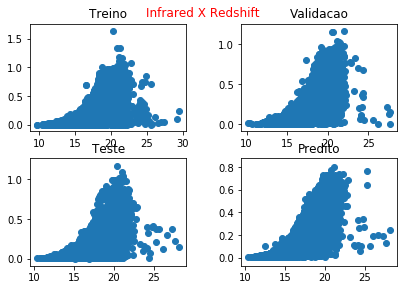

In [7]:
plot_scatter(X_train, y_train, X_val, y_val, X_test, y_test, preds, show_only=True)

In [8]:
 mse = (((pred - real) ** 2).sum()) / len(pred)

print('Cross-Val Score:', score)
print('Mean Squared Error:', mse)

Cross-Val Score: 0.908477604145
Mean Squared Error: 0.00119656851409


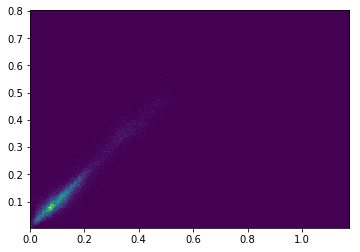

In [9]:
plot_hm(real, pred, show_only=True)